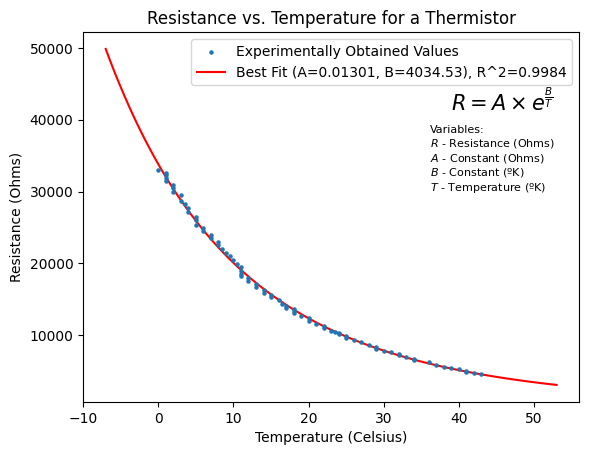

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Equation for a thermistor
# Source: https://www.cetti.ro/v2/curs_ccp/materiale_ccp/TERMISTOARE/Thermistors_EN_2013_revG.pdf
def model_equation(temps_c, A, B):
    return A * np.exp(B / (temps_c + 273.15))

# Collected Data from Spreadsheet
raw_resistances_kohm = [
    4.63, 4.77, 4.93, 5.07, 5.23, 5.43, 5.59, 5.79, 6.23, 6.54,
    6.71, 6.97, 7.2, 7.37, 7.62, 7.85, 8.04, 8.32, 8.59, 8.98,
    9.34, 9.61, 9.86, 10.09, 10.33, 10.47, 10.62, 10.96, 11.26, 11.6,
    12.01, 12.32, 12.68, 13.11, 13.39, 13.58, 13.74, 13.99, 14.36, 14.85,
    15.25, 15.55, 15.87, 16.35, 16.67, 17.18, 17.48, 17.93, 18.29, 18.55,
    18.9, 19.48, 19.96, 20.41, 20.99, 21.5, 22.06, 22.56, 23.03, 23.55,
    24, 24.48, 24.96, 25.41, 26.02, 26.49, 27.09, 27.67, 28.2, 28.71,
    29.48, 29.99, 30.48, 30.9, 31.44, 31.91, 32.28, 32.61, 33.01
]

raw_temps_c = [
    43, 42, 41, 41, 40, 39, 38, 37, 36, 34, 34, 33, 32, 32, 31, 30, 29, 29,
    28, 27, 26, 25, 25, 24, 24, 23.5, 23, 22, 22, 21, 20, 20, 19, 18, 18, 18,
    17, 17, 16.5, 16, 15, 15, 14, 14, 13, 13, 12, 12, 11, 11, 11, 11, 10.5, 10,
    9.5, 9, 8.5, 8, 8, 7, 7, 6, 6, 5, 5, 5, 4, 4, 3.5, 3, 3, 2, 2, 2, 1, 1, 1, 1, 0
]

#Process data
resistances_kohm = np.array(raw_resistances_kohm)
resistances_ohm = resistances_kohm * 1000
temps_c = np.array(raw_temps_c)

# Brute-force approach to find the best-fitting A and B
best_r_squared = -np.inf
best_params = None
A_values = np.linspace(-1, 1, 1000)
B_values = np.linspace(1500, 4500, 1000)
for A in A_values:
    for B in B_values:
        predicted_resistances = model_equation(temps_c, A, B)
        r_squared = 1 - np.sum((resistances_ohm - predicted_resistances)**2) / np.sum((resistances_ohm - np.mean(resistances_ohm))**2)

        #Highest R^2 means the best fit
        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_params = (A, B)

# Plotting the best-fitting equation
best_A, best_B = best_params
best_fit_curve = model_equation(np.linspace(-7, 53, 100), best_A, best_B)

plt.scatter(temps_c, resistances_ohm, label='Experimentally Obtained Values', s=5, zorder=10)
plt.plot(np.linspace(-7, 53, 100), best_fit_curve, label=f'Best Fit (A={best_A:.5f}, B={best_B:.2f}), R^2={best_r_squared:.4f}', color='red')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Resistance (Ohms)')

# Adding the equation text slightly down from the top right corner
equation_text = f'$R = A \\times e^{{\\frac{{B}}{{T}}}}$'
plt.text(0.95, 0.85, equation_text, transform=plt.gca().transAxes, fontsize=15, ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

# Adding variable explanations below the equation
variable_text = 'Variables:\n$R$ - Resistance (Ohms)\n$A$ - Constant (Ohms)\n$B$ - Constant (ºK)\n$T$ - Temperature (ºK)'
plt.text(0.7, 0.75, variable_text, transform=plt.gca().transAxes, fontsize=8, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.title('Resistance vs. Temperature for a Thermistor')

plt.legend()
plt.show()